In [2]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

#read the data

df = pd.read_csv(r'C:\Users\sarin\Desktop\kindlebookdata.csv')

df.head()


,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,01/06/2015,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,15/02/2022,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,13/09/2022,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,25/02/2020,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,05/05/2015,Parenting & Relationships


In [3]:
#Data cleaning

for col in df.columns:
    count_missing = df[col].isnull().sum().sum()
    #print('{} - {}'.format(col, count_missing))
    
    total_count = len(df.asin)
    
    percent_missing = count_missing * 100 / total_count
    print('{} - {}%'.format(col, percent_missing))
    

asin - 0.0%
title - 0.0%
author - 0.3193039924268606%
soldBy - 6.936785322534598%
imgUrl - 0.0%
productURL - 0.0%
stars - 0.0%
reviews - 0.0%
price - 0.0%
isKindleUnlimited - 0.0%
category_id - 0.0%
isBestSeller - 0.0%
isEditorsPick - 0.0%
isGoodReadsChoice - 0.0%
publishedDate - 36.82589292422353%
category_name - 0.0%


In [4]:
#Remove missing data

df = df.dropna()

In [5]:
#check
for col in df.columns:
    count_missing = df[col].isnull().sum().sum()
    #print('{} - {}'.format(col, count_missing))
    
    total_count = len(df.asin)
    
    percent_missing = count_missing * 100 / total_count
    print('{} - {}%'.format(col, percent_missing))

asin - 0.0%
title - 0.0%
author - 0.0%
soldBy - 0.0%
imgUrl - 0.0%
productURL - 0.0%
stars - 0.0%
reviews - 0.0%
price - 0.0%
isKindleUnlimited - 0.0%
category_id - 0.0%
isBestSeller - 0.0%
isEditorsPick - 0.0%
isGoodReadsChoice - 0.0%
publishedDate - 0.0%
category_name - 0.0%


In [6]:
#data types
df.dtypes

asin                  object
title                 object
author                object
soldBy                object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
isKindleUnlimited       bool
category_id            int64
isBestSeller            bool
isEditorsPick           bool
isGoodReadsChoice       bool
publishedDate         object
category_name         object
dtype: object

In [7]:
#Remove duplicates
df.drop_duplicates()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,01/06/2015,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,15/02/2022,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,13/09/2022,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,25/02/2020,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,05/05/2015,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133097,B0C3SJDLK8,Anna Karenina,Leo Tolstoy,De Marque,https://m.media-amazon.com/images/I/61RXEyMctk...,https://www.amazon.com/dp/B0C3SJDLK8,4.7,0,0.00,False,29,True,False,False,15/09/2023,Nonfiction
133098,B09DW752Y1,Scary Smart: Scary Smart: The Future of Artifi...,Mo Gawdat,Amazon.com Services LLC,https://m.media-amazon.com/images/I/71tjf6R-Wa...,https://www.amazon.com/dp/B09DW752Y1,4.4,0,9.99,False,29,False,False,False,30/09/2021,Nonfiction
133099,B0CFWHPJTN,The Count of Monte Cristo: The Original Unabri...,Alexandre Dumas,De Marque,https://m.media-amazon.com/images/I/71zcCb5Pvu...,https://www.amazon.com/dp/B0CFWHPJTN,4.8,0,1.99,False,29,True,False,False,15/09/2023,Nonfiction
133100,B0C1KMFXJC,War And Peace,Leo Tolstoy,De Marque,https://m.media-amazon.com/images/I/715QpZlzmi...,https://www.amazon.com/dp/B0C1KMFXJC,4.7,0,0.00,False,29,True,False,False,25/08/2023,Nonfiction


In [8]:
#Extract year from publishedDate

df['year_Published'] = df['publishedDate'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name,year_Published
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,01/06/2015,Parenting & Relationships,2015
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,15/02/2022,Parenting & Relationships,2022
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,13/09/2022,Parenting & Relationships,2022
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,25/02/2020,Parenting & Relationships,2020
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,05/05/2015,Parenting & Relationships,2015


In [9]:
df = df.sort_values(by = ['stars'], inplace = False, ascending = False)

df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name,year_Published
112275,B09SB8NGR9,Radically Inclusive Teaching With Newcomer and...,Alison G. Dover,Amazon.com Services LLC,https://m.media-amazon.com/images/I/816SxMHoS0...,https://www.amazon.com/dp/B09SB8NGR9,5.0,0,26.49,False,22,False,False,False,01/04/2022,Reference,2022
6477,B0BYW6DVTQ,The Day One Executive: A Guidebook to Stand Ou...,April Armstrong,Amazon.com Services LLC,https://m.media-amazon.com/images/I/71r8X3TjpY...,https://www.amazon.com/dp/B0BYW6DVTQ,5.0,0,10.49,False,11,False,False,False,17/03/2023,Engineering & Transportation,2023
111522,B0BTZRG9S4,John Sandford Books in Order: Prey/Lucas Daven...,Vicky Yamashita,Amazon.com Services LLC,https://m.media-amazon.com/images/I/61DlfQVC3H...,https://www.amazon.com/dp/B0BTZRG9S4,5.0,0,0.00,False,22,False,False,False,05/02/2023,Reference,2023
111536,B0CG519N89,Fool Proof Romance: Love Between the Beat Sheets,Christopher Downing,Amazon.com Services LLC,https://m.media-amazon.com/images/I/71LlcgmKTz...,https://www.amazon.com/dp/B0CG519N89,5.0,0,9.99,False,22,False,False,False,19/08/2023,Reference,2023
111564,B07SM1GDVB,Chinese Wonderland Textbook 3: (Traditional) (...,Jenpei Chao,Amazon.com Services LLC,https://m.media-amazon.com/images/I/A1ch-QPlkL...,https://www.amazon.com/dp/B07SM1GDVB,5.0,0,9.99,False,22,False,False,False,02/06/2019,Reference,2019


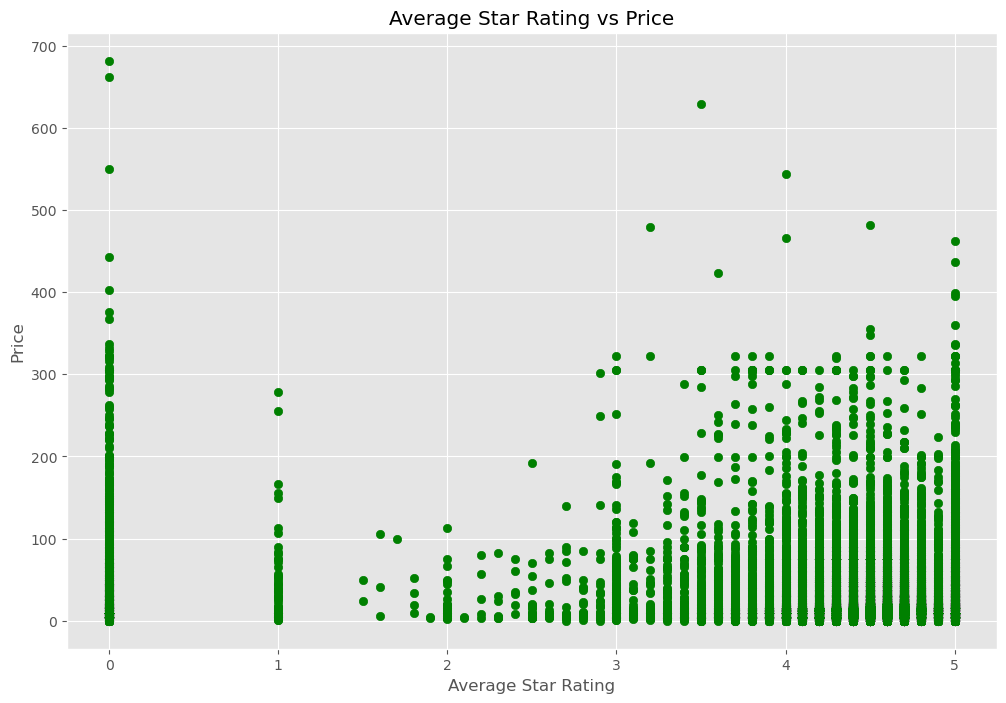

In [10]:
#Scatter graph stars vs price

plt.scatter(x=df['stars'], y=df['price'], c="green")

plt.title('Average Star Rating vs Price')

plt.xlabel('Average Star Rating')

plt.ylabel('Price')

plt.show()


<Axes: xlabel='stars', ylabel='price'>

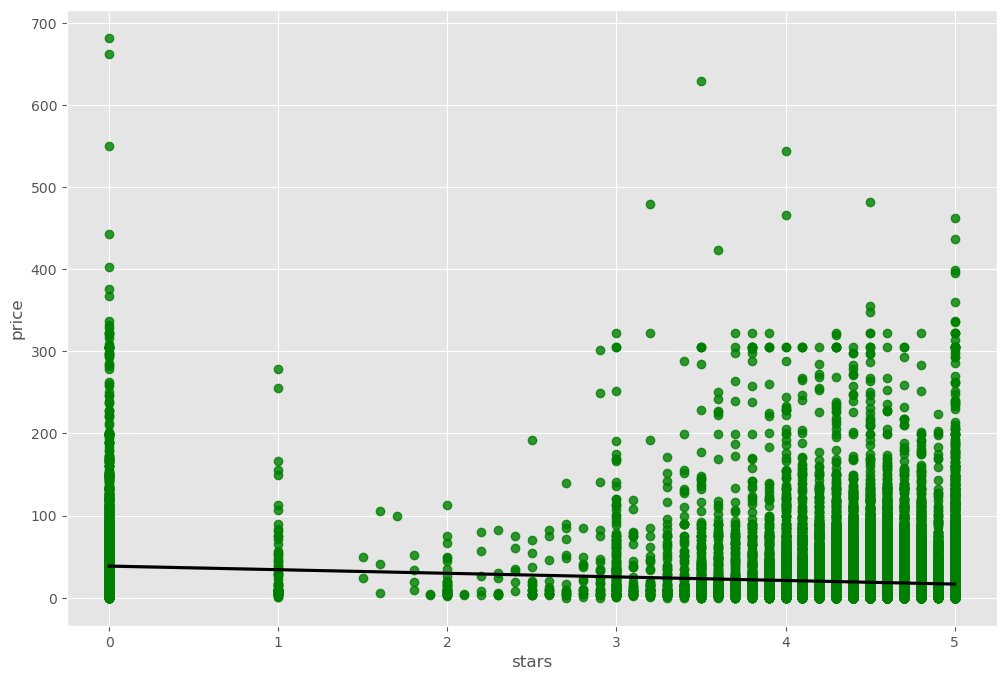

In [11]:
#Avg star vs price using seaborn

sns.regplot(x='stars', y='price', data=df, scatter_kws={"color" : "green"}, line_kws={"color": "black"})

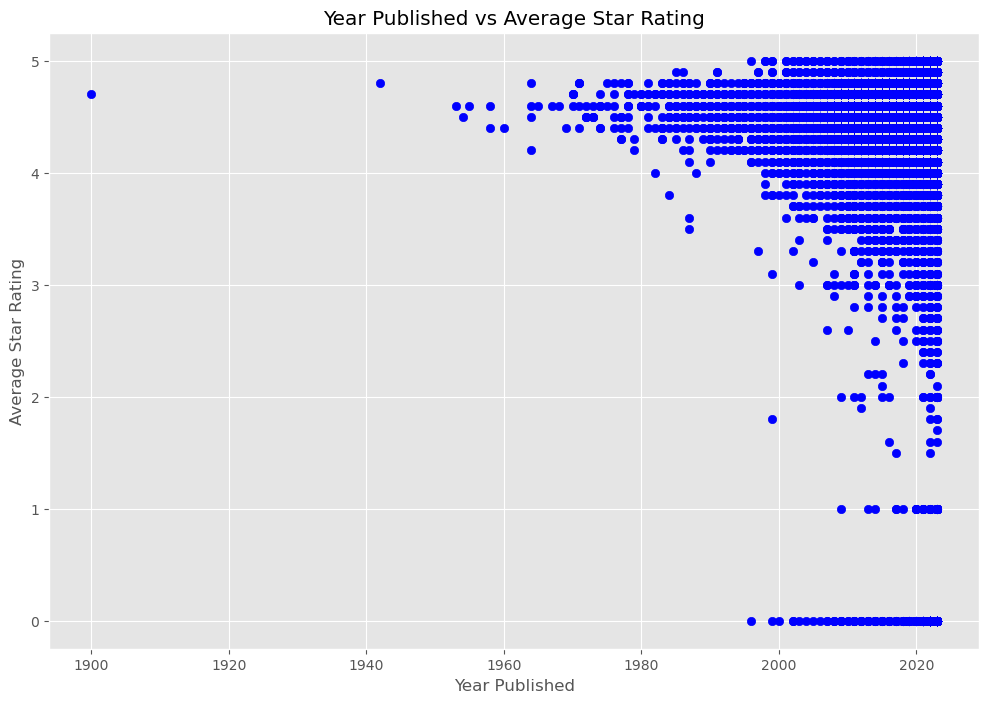

In [12]:
#Scatter graph year vs stars

plt.scatter(x=df['year_Published'], y=df['stars'], c="blue")

plt.title('Year Published vs Average Star Rating')

plt.xlabel('Year Published')

plt.ylabel('Average Star Rating')

plt.show()

<Axes: xlabel='year_Published', ylabel='stars'>

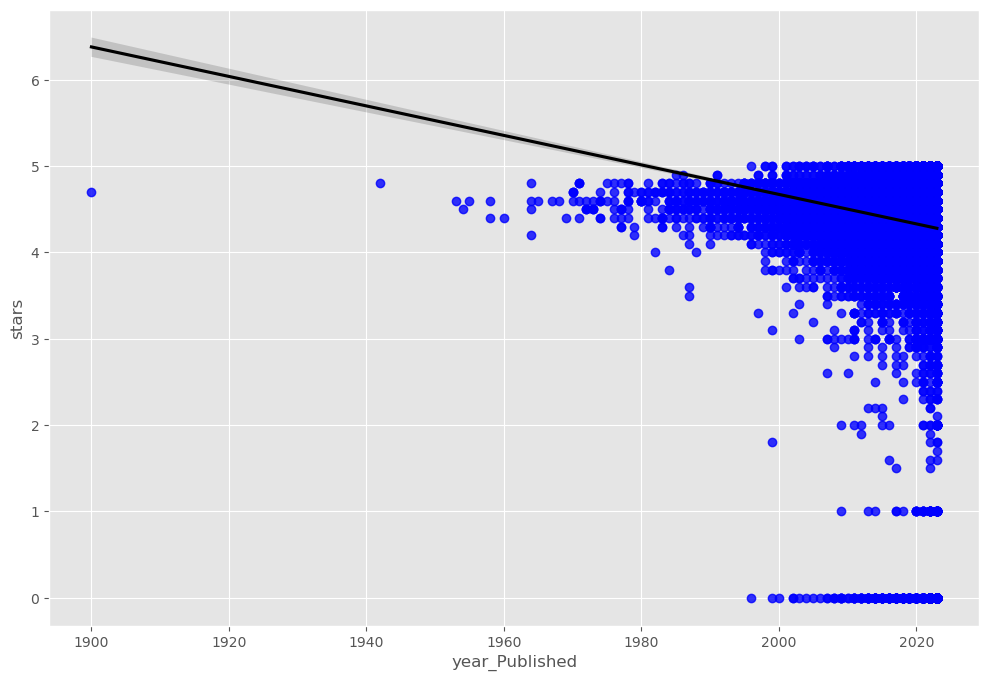

In [13]:
#year published vs averge star rating using seaborn

sns.regplot(x='year_Published', y='stars', data=df, scatter_kws={"color" : "blue"}, line_kws={"color": "black"})

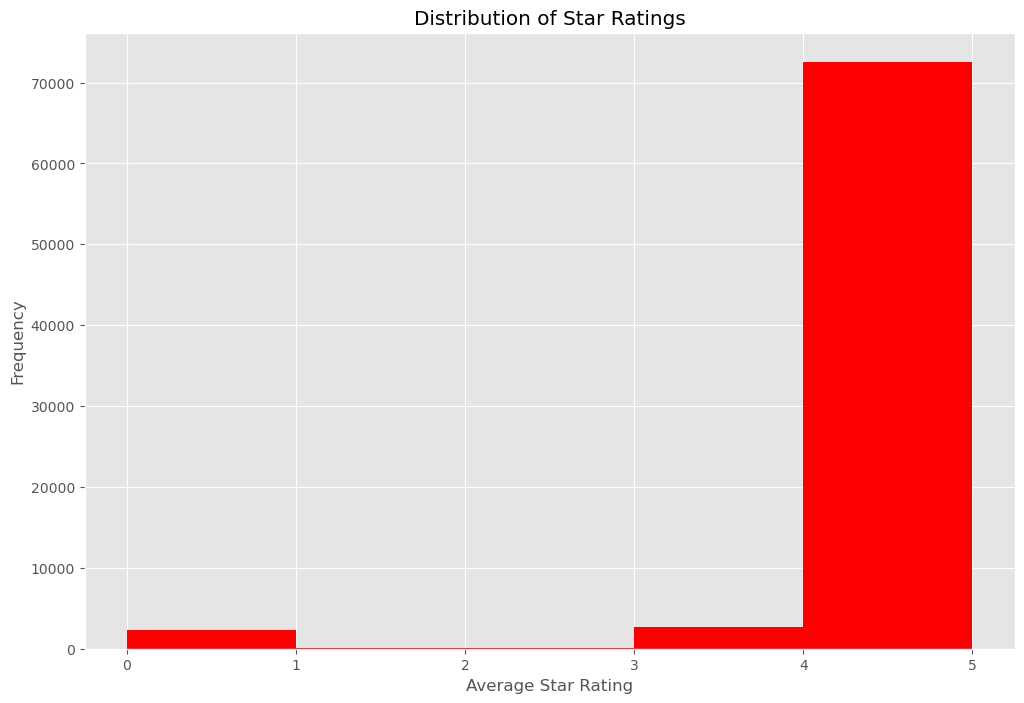

In [33]:
#Check distribution of star ratings

plt.hist(df['stars'], bins=5, color='red')
plt.xlabel('Average Star Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Star Ratings')
plt.grid(True)
plt.show()

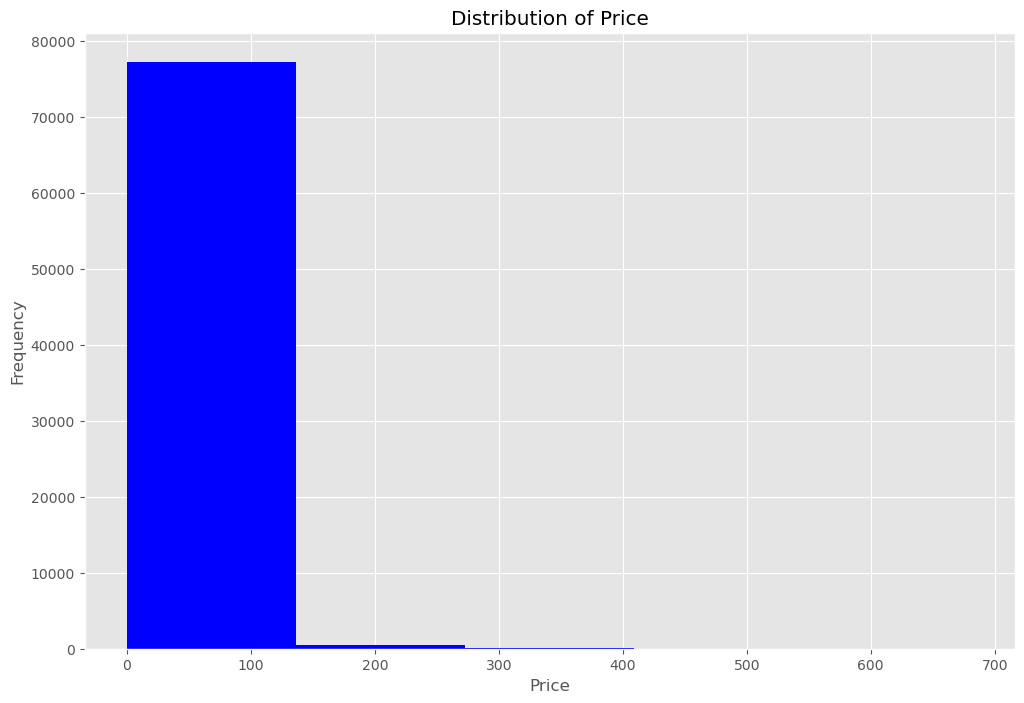

In [59]:
#Check distribution of price

plt.hist(df['price'], bins=5, color='blue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.grid(True)
plt.show()

In [35]:
#Pearson Correlation

df.corr(method="pearson", numeric_only = True)

,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,year_Published
stars,1.000000,0.022095,-0.137744,-0.038591,0.021483,0.016897,0.019980,0.011872,-0.114040
reviews,0.022095,1.000000,-0.041406,0.018902,-0.047296,0.023862,0.128157,0.126381,-0.031089
price,-0.137744,-0.041406,1.000000,-0.198333,-0.055004,-0.052146,-0.059601,-0.028926,0.019556
isKindleUnlimited,-0.038591,0.018902,-0.198333,1.000000,0.067177,0.145637,-0.061632,-0.015544,0.187997
category_id,0.021483,-0.047296,-0.055004,0.067177,1.000000,0.013641,-0.037302,-0.015565,0.039630
isBestSeller,0.016897,0.023862,-0.052146,0.145637,0.013641,1.000000,-0.028933,-0.012341,0.035704
isEditorsPick,0.019980,0.128157,-0.059601,-0.061632,-0.037302,-0.028933,1.000000,-0.021654,0.047934
isGoodReadsChoice,0.011872,0.126381,-0.028926,-0.015544,-0.015565,-0.012341,-0.021654,1.000000,-0.020124
year_Published,-0.114040,-0.031089,0.019556,0.187997,0.039630,0.035704,0.047934,-0.020124,1.000000


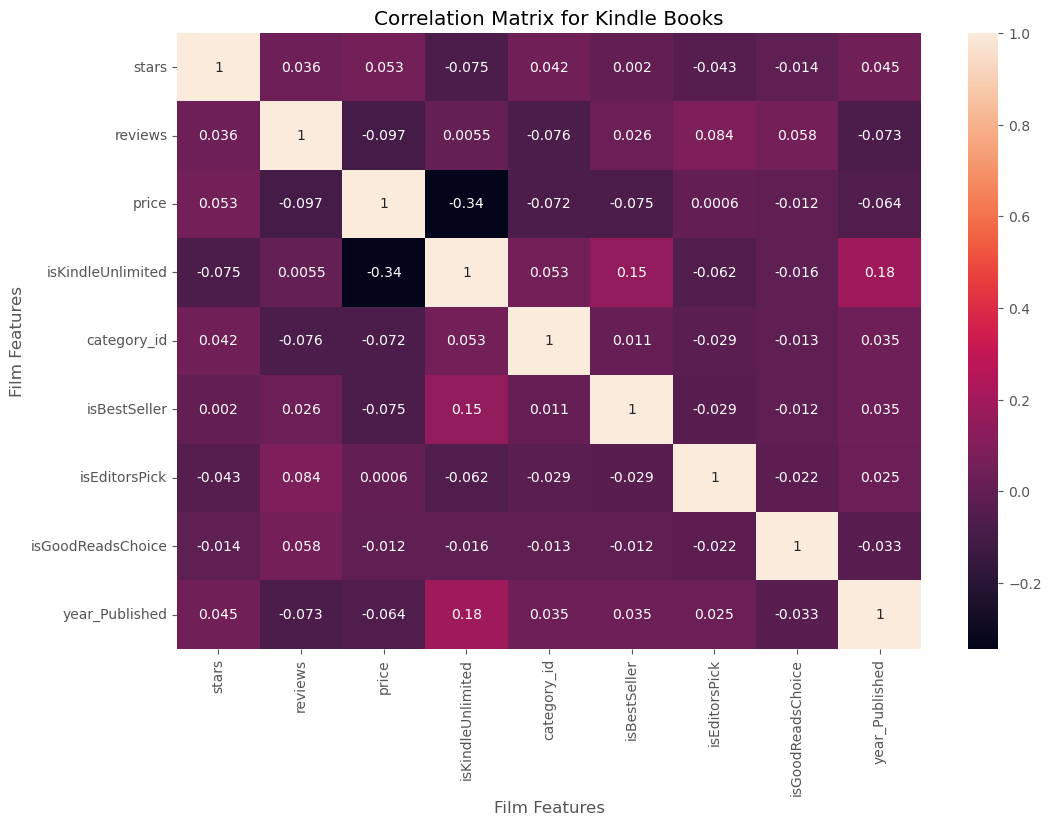

In [38]:
#correlation matrix

correlation_matrix = df.corr(method="kendall", numeric_only = True)
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Kindle Books')
plt.xlabel('Film Features')
plt.ylabel('Film Features')
plt.show()

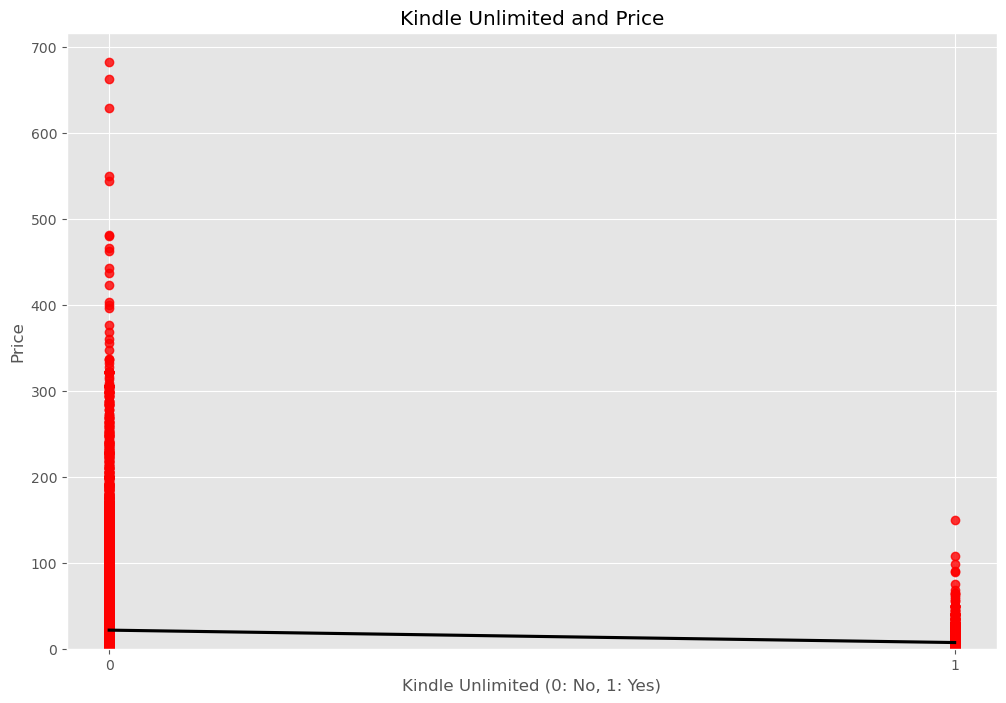

In [63]:
# price vs isKindleUnlimited using seaborn

sns.regplot(x='isKindleUnlimited', y='price', data=df, scatter_kws={"color" : "red"}, line_kws={"color": "black"})
plt.ylim(0,)
plt.xlabel('Kindle Unlimited (0: No, 1: Yes)')
plt.ylabel('Price')
plt.title('Kindle Unlimited and Price')
plt.xticks([0, 1])
plt.grid(True)
plt.show()

In [46]:
#Calculate averaage star rating per book seller

mean_stars_by_seller = df.groupby('soldBy')['stars'].mean().reset_index()
mean_stars_by_seller.sort_values('stars', ascending= False).head()

,soldBy,stars
10,Gallimard Lt.,5.00000
36,Yen Press LLC,4.75000
0,Amazon Digital Services LLC GU,4.70000
15,HarperCollins Publishing,4.67486
2,Amazon Digital Services LLC MK,4.60000


In [47]:
#Median star rating per book seller

median_stars_by_seller = df.groupby('soldBy')['stars'].median().reset_index()
median_stars_by_seller.sort_values('stars', ascending= False).head()

,soldBy,stars
10,Gallimard Lt.,5.00
8,EDIGITA,4.80
36,Yen Press LLC,4.75
15,HarperCollins Publishing,4.70
0,Amazon Digital Services LLC GU,4.70


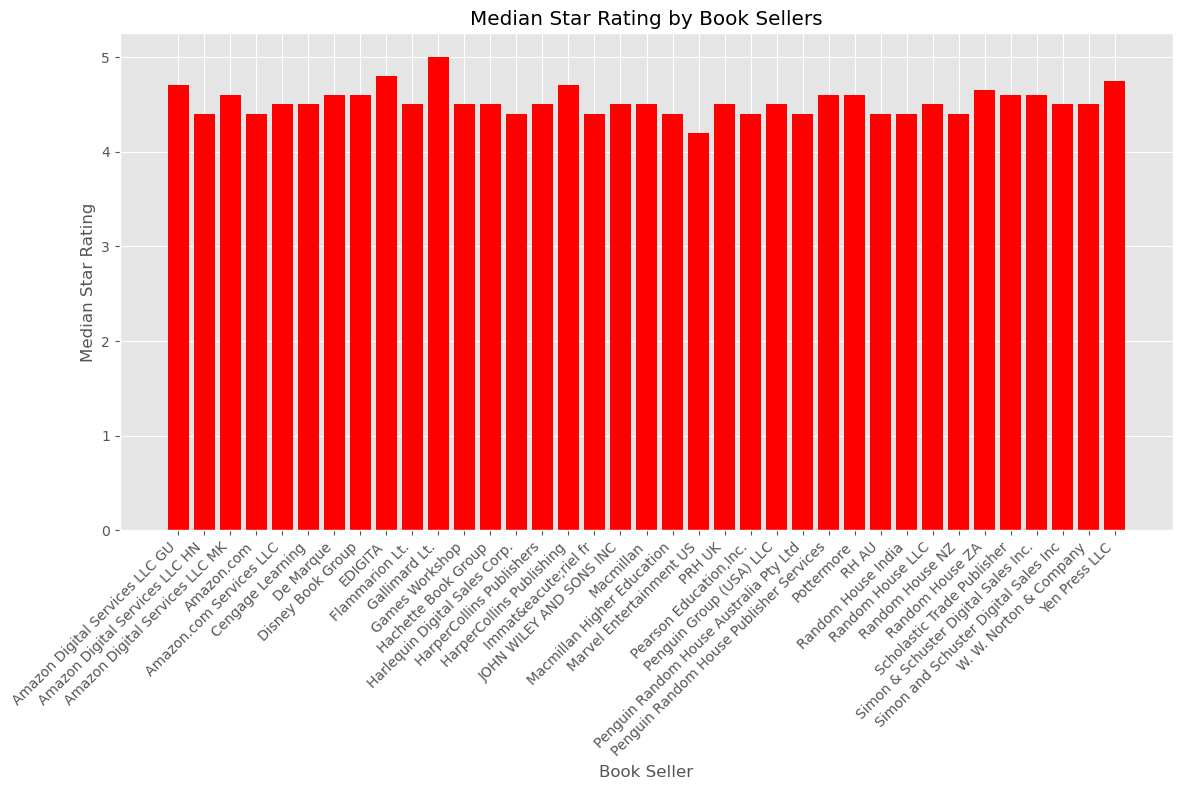

In [58]:
#Bar chart Book Sellers average star ratings

plt.bar(x=median_stars_by_seller['soldBy'], height=median_stars_by_seller['stars'], color='red')

plt.title('Median Star Rating by Book Sellers')
plt.xlabel('Book Seller')
plt.ylabel('Median Star Rating')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [51]:
#Average price of a book by seller

mean_price_by_seller = df.groupby('soldBy')['price'].mean().reset_index()
mean_price_by_seller.sort_values('price', ascending= False).head()


,soldBy,price
8,EDIGITA,105.390000
22,"Pearson Education,Inc.",76.365742
35,W. W. Norton & Company,47.063362
5,Cengage Learning,44.957979
17,JOHN WILEY AND SONS INC,43.476540


In [52]:
#median price of a book by seller

median_price_by_seller = df.groupby('soldBy')['price'].median().reset_index()
median_price_by_seller.sort_values('price', ascending= False).head()

,soldBy,price
8,EDIGITA,109.99
22,"Pearson Education,Inc.",74.99
5,Cengage Learning,46.99
35,W. W. Norton & Company,43.54
19,Macmillan Higher Education,40.03


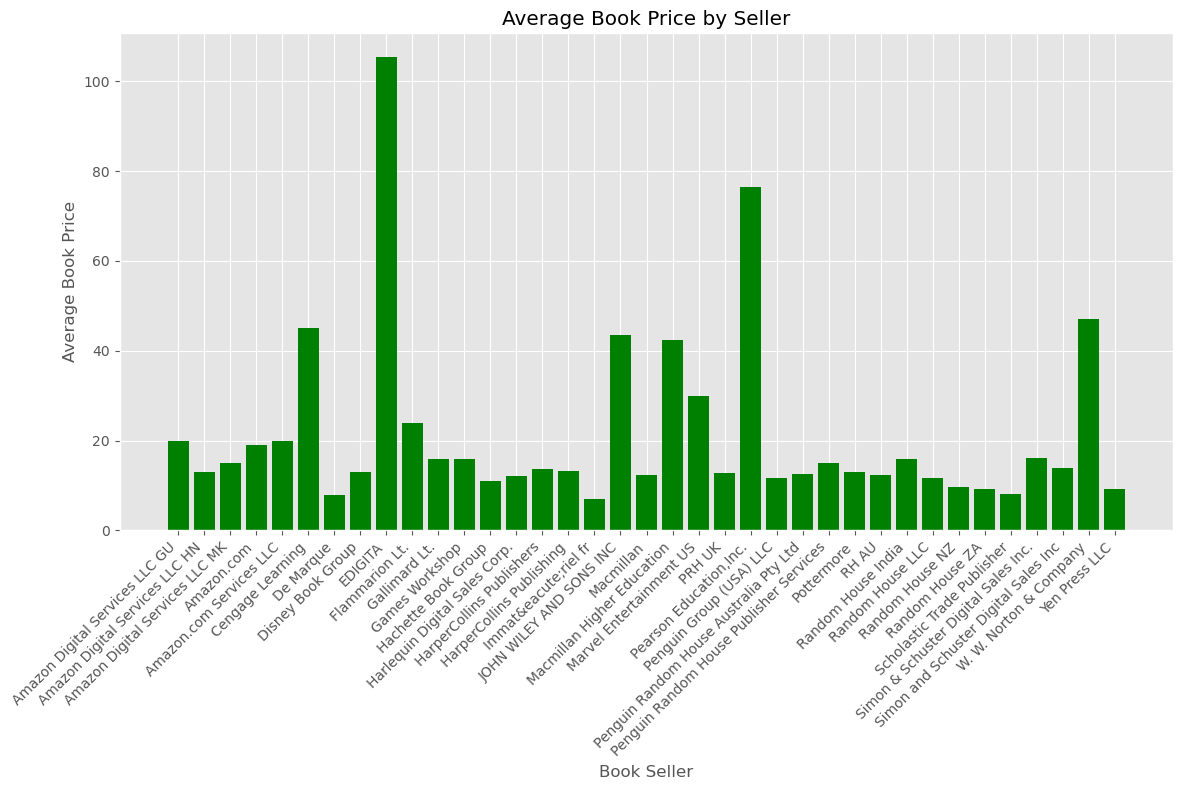

In [56]:
#Bar chart Mean Book Price by Seller

plt.bar(x=mean_price_by_seller['soldBy'], height=mean_price_by_seller['price'], color = 'green')

plt.title('Average Book Price by Seller')
plt.xlabel('Book Seller')
plt.ylabel('Average Book Price')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()